In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as np
import numpy as np

from scipy.stats import chi2_contingency 
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, OneHotEncoder


In [2]:
train=pd.read_csv('Datasets/Train.csv')
test=pd.read_csv('datasets/test.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [3]:
print(train.shape, test.shape)

(18506, 21) (6169, 20)


In [4]:
train.head(2)

,Tour_ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,...,package_accomodation,package_food,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,first_trip_tz,cost_category
0,tour_id1hffseyw,ITALY,45-64,With Children,0.0,2.0,Visiting Friends and Relatives,Beach Tourism,"Friends, relatives",Package Tour,...,Yes,Yes,Yes,No,No,No,0,7,Yes,High Cost
1,tour_idnacd7zag,UNITED KINGDOM,25-44,With Spouse,1.0,1.0,Leisure and Holidays,Wildlife Tourism,"Travel agent, tour operator",Package Tour,...,Yes,Yes,Yes,No,No,No,0,7,Yes,High Cost


In [5]:
test.head(2)

,Tour_ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,package_transport_int,package_accomodation,package_food,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,first_trip_tz
0,tour_idynufedne,KOREA,25-44,Alone,0.0,1.0,Leisure and Holidays,Widlife Tourism,Others,Independent,No,No,No,No,No,No,No,7,4,Yes
1,tour_id9r3y5moe,UNITED KINGDOM,45-64,With Children,1.0,1.0,Leisure and Holidays,Conference Tourism,"Travel agent, tour operator",Package Tour,Yes,Yes,Yes,Yes,Yes,Yes,Yes,7,0,Yes


In [6]:
train.duplicated().sum()

0

In [7]:
test.duplicated().sum()

0

In [8]:
full=pd.concat(objs=[train, test], axis=0)
full.shape

<IPython.core.display.Javascript object>

(24675, 21)

In [9]:
full.duplicated().sum()

0

In [10]:
full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24675 entries, 0 to 6168
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Tour_ID                24675 non-null  object 
 1   country                24675 non-null  object 
 2   age_group              24675 non-null  object 
 3   travel_with            23239 non-null  object 
 4   total_female           24671 non-null  float64
 5   total_male             24668 non-null  float64
 6   purpose                24675 non-null  object 
 7   main_activity          24675 non-null  object 
 8   info_source            24675 non-null  object 
 9   tour_arrangement       24675 non-null  object 
 10  package_transport_int  24675 non-null  object 
 11  package_accomodation   24675 non-null  object 
 12  package_food           24675 non-null  object 
 13  package_transport_tz   24675 non-null  object 
 14  package_sightseeing    24675 non-null  object 
 15  pac

In [11]:
cat=[c for c in full.select_dtypes ('object').columns]
num= [c for c in full.select_dtypes('int64', 'float64').columns]

In [12]:
full.isna().sum()

Tour_ID                     0
country                     0
age_group                   0
travel_with              1436
total_female                4
total_male                  7
purpose                     0
main_activity               0
info_source                 0
tour_arrangement            0
package_transport_int       0
package_accomodation        0
package_food                0
package_transport_tz        0
package_sightseeing         0
package_guided_tour         0
package_insurance           0
night_mainland              0
night_zanzibar              0
first_trip_tz               0
cost_category            6169
dtype: int64

In [13]:
full.describe().T

,count,mean,std,min,25%,50%,75%,max
total_female,24671.0,0.932796,1.205086,0.0,0.0,1.0,1.0,49.0
total_male,24668.0,1.003446,1.270691,0.0,1.0,1.0,1.0,90.0
night_mainland,24675.0,9.184113,14.719152,0.0,3.0,6.0,11.0,664.0
night_zanzibar,24675.0,2.516596,5.323307,0.0,0.0,0.0,4.0,240.0


In [14]:
full.isna().sum()

Tour_ID                     0
country                     0
age_group                   0
travel_with              1436
total_female                4
total_male                  7
purpose                     0
main_activity               0
info_source                 0
tour_arrangement            0
package_transport_int       0
package_accomodation        0
package_food                0
package_transport_tz        0
package_sightseeing         0
package_guided_tour         0
package_insurance           0
night_mainland              0
night_zanzibar              0
first_trip_tz               0
cost_category            6169
dtype: int64

In [130]:
full=pd.concat(objs=[train, test], axis=0)

<IPython.core.display.Javascript object>

In [131]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline

def fillna(X, inplace=None):
    for col in X.columns:
        if col != 'cost_category' and X[col].isna().any():
            if X[col].dtype == 'object':
                strategy = 'most_frequent'
                pipe = make_pipeline(SimpleImputer(strategy=strategy))
            else:
                strategy= 'median'
                pipe = make_pipeline(SimpleImputer(strategy=strategy ))
            X[col] = pipe.fit_transform(X[[col]])
            
            if not inplace:
                return print("DataFrame not updated.")
            else:
                print(f"Missing Values in '{col}' column have been filled with the {strategy} value.")
                
    if inplace:
        return None

In [132]:
fillna(full, inplace=True)

Missing Values in 'travel_with' column have been filled with the most_frequent value.
Missing Values in 'total_female' column have been filled with the median value.
Missing Values in 'total_male' column have been filled with the median value.


In [18]:
full.isnull().sum()

Tour_ID                     0
country                     0
age_group                   0
travel_with                 0
total_female                0
total_male                  0
purpose                     0
main_activity               0
info_source                 0
tour_arrangement            0
package_transport_int       0
package_accomodation        0
package_food                0
package_transport_tz        0
package_sightseeing         0
package_guided_tour         0
package_insurance           0
night_mainland              0
night_zanzibar              0
first_trip_tz               0
cost_category            6169
dtype: int64

In [19]:
for col in full.select_dtypes('object'):
    print(col, len(full[col].unique()))

Tour_ID 24675
country 141
age_group 5
travel_with 5
purpose 8
main_activity 10
info_source 8
tour_arrangement 2
package_transport_int 2
package_accomodation 2
package_food 2
package_transport_tz 2
package_sightseeing 2
package_guided_tour 2
package_insurance 2
first_trip_tz 2
cost_category 7


In [114]:
def cat_unique(dataset):
    for col in dataset.select_dtypes('object'):
        if dataset[col].nunique() > 10:
            print(f"\nColumn: {col}\nTotal Sum of Unique Values:  {dataset[col].nunique()}")
        else:
            print(f"\nColumn: {col}\nUnique Values: {dataset[col].unique()}")

In [115]:
cat_unique(full)


Column: Tour_ID
Total Sum of Unique Values:  24675

Column: country
Total Sum of Unique Values:  141

Column: age_group
Unique Values: ['45-64' '25-44' '65+' '18-24' '<18']

Column: travel_with
Unique Values: ['With Children' 'With Spouse' 'With Spouse and Children' 'Alone'
 'With Other Friends/Relatives']

Column: purpose
Unique Values: ['Visiting Friends and Relatives' 'Leisure and Holidays' 'Business'
 'Scientific and Academic' 'Meetings and Conference' 'Volunteering'
 'Other' 'Medical']

Column: main_activity
Unique Values: ['Beach Tourism' 'Wildlife Tourism' 'Widlife Tourism' 'Cultural Tourism'
 'Bird Tourism' 'Hunting Tourism' 'Conference Tourism' 'Mountain Climbing'
 'Business' 'Diving and Sport Fishing']

Column: info_source
Unique Values: ['Friends, relatives' 'Travel agent, tour operator' 'Radio, TV, Web'
 'Newspaper, magazines, brochures' 'Others' 'Tanzania Mission Abroad'
 'Inflight magazines' 'Trade fair']

Column: tour_arrangement
Unique Values: ['Package Tour' 'Independ

In [133]:
full['main_activity'].replace({'Widlife Tourism':'Wildlife Tourism'}, inplace=True)

In [134]:
full.main_activity.value_counts()

Wildlife Tourism            11050
Beach Tourism                5604
Conference Tourism           2532
Hunting Tourism              2235
Cultural Tourism             1939
Mountain Climbing             727
Business                      370
Bird Tourism                  178
Diving and Sport Fishing       40
Name: main_activity, dtype: int64

In [117]:
cat_unique(full)


Column: Tour_ID
Total Sum of Unique Values:  24675

Column: country
Total Sum of Unique Values:  141

Column: age_group
Unique Values: ['45-64' '25-44' '65+' '18-24' '<18']

Column: travel_with
Unique Values: ['With Children' 'With Spouse' 'With Spouse and Children' 'Alone'
 'With Other Friends/Relatives']

Column: purpose
Unique Values: ['Visiting Friends and Relatives' 'Leisure and Holidays' 'Business'
 'Scientific and Academic' 'Meetings and Conference' 'Volunteering'
 'Other' 'Medical']

Column: main_activity
Unique Values: ['Beach Tourism' 'Wildlife Tourism' 'Cultural Tourism' 'Bird Tourism'
 'Hunting Tourism' 'Conference Tourism' 'Mountain Climbing' 'Business'
 'Diving and Sport Fishing']

Column: info_source
Unique Values: ['Friends, relatives' 'Travel agent, tour operator' 'Radio, TV, Web'
 'Newspaper, magazines, brochures' 'Others' 'Tanzania Mission Abroad'
 'Inflight magazines' 'Trade fair']

Column: tour_arrangement
Unique Values: ['Package Tour' 'Independent']

Column: pac

In [118]:
full.main_activity.nunique()

9

In [127]:
def chi_test(X, y):
    
    col_drop= []
    not_drop= []
    undecided=[]
    
    for col in X.columns:
        ct=pd.crosstab(y, X[col])
        chi2, p, dof, expected = chi2_contingency(ct)
        
        if p >= 0.05 or chi2 <= 2000:
            col_drop.append(col)
        elif p <0.05 and  chi2 >= 5000:
            not_drop.append(col)
        elif p < 0.05 and 2000 < chi2 < 5000:
            undecided.append(col)
        
        print(f"Column: {col}\nChi Test: {chi2}\nP_Value: {p}\nDOF: {dof}\n------------")
    return print(f"\n\nSUMMARY: \nLittle or No correlation Columns: {col_drop}\n\nStrong Correlation Columns: {not_drop}\n\nCorrelation not so strong columns: {undecided}")

In [135]:
X=full.drop('cost_category', axis=1)
y=full['cost_category']

In [136]:
chi_test(X, y)

<IPython.core.display.Javascript object>

Column: Tour_ID
Chi Test: 92530.0
P_Value: 0.4947449902995666
DOF: 92525
------------


<IPython.core.display.Javascript object>

Column: country
Chi Test: 9779.033678192025
P_Value: 0.0
DOF: 650
------------


<IPython.core.display.Javascript object>

Column: age_group
Chi Test: 1803.196457648891
P_Value: 0.0
DOF: 20
------------


<IPython.core.display.Javascript object>

Column: travel_with
Chi Test: 4750.174328498706
P_Value: 0.0
DOF: 20
------------


<IPython.core.display.Javascript object>

Column: total_female
Chi Test: 3730.2094106443064
P_Value: 0.0
DOF: 115
------------


<IPython.core.display.Javascript object>

Column: total_male
Chi Test: 1398.489543210294
P_Value: 2.2443121745916526e-219
DOF: 115
------------


<IPython.core.display.Javascript object>

Column: purpose
Chi Test: 6975.312873617305
P_Value: 0.0
DOF: 35
------------


<IPython.core.display.Javascript object>

Column: main_activity
Chi Test: 3606.50524881434
P_Value: 0.0
DOF: 40
------------


<IPython.core.display.Javascript object>

Column: info_source
Chi Test: 4166.3943611855575
P_Value: 0.0
DOF: 35
------------


<IPython.core.display.Javascript object>

Column: tour_arrangement
Chi Test: 8331.284428771029
P_Value: 0.0
DOF: 5
------------


<IPython.core.display.Javascript object>

Column: package_transport_int
Chi Test: 5414.9841247089
P_Value: 0.0
DOF: 5
------------


<IPython.core.display.Javascript object>

Column: package_accomodation
Chi Test: 7883.608233888307
P_Value: 0.0
DOF: 5
------------


<IPython.core.display.Javascript object>

Column: package_food
Chi Test: 7146.769578021885
P_Value: 0.0
DOF: 5
------------


<IPython.core.display.Javascript object>

Column: package_transport_tz
Chi Test: 6346.490489845604
P_Value: 0.0
DOF: 5
------------


<IPython.core.display.Javascript object>

Column: package_sightseeing
Chi Test: 4501.574863783683
P_Value: 0.0
DOF: 5
------------


<IPython.core.display.Javascript object>

Column: package_guided_tour
Chi Test: 4873.499054202309
P_Value: 0.0
DOF: 5
------------


<IPython.core.display.Javascript object>

Column: package_insurance
Chi Test: 2067.872038967938
P_Value: 0.0
DOF: 5
------------


<IPython.core.display.Javascript object>

Column: night_mainland
Chi Test: 5614.015301227679
P_Value: 0.0
DOF: 545
------------


<IPython.core.display.Javascript object>

Column: night_zanzibar
Chi Test: 2652.1882265219597
P_Value: 0.0
DOF: 295
------------


<IPython.core.display.Javascript object>

Column: first_trip_tz
Chi Test: 2229.180451768042
P_Value: 0.0
DOF: 5
------------


SUMMARY: 
Little or No correlation Columns: ['Tour_ID', 'age_group', 'total_male']

Strong Correlation Columns: ['country', 'purpose', 'tour_arrangement', 'package_transport_int', 'package_accomodation', 'package_food', 'package_transport_tz', 'night_mainland']

Correlation not so strong columns: ['travel_with', 'total_female', 'main_activity', 'info_source', 'package_sightseeing', 'package_guided_tour', 'package_insurance', 'night_zanzibar', 'first_trip_tz']


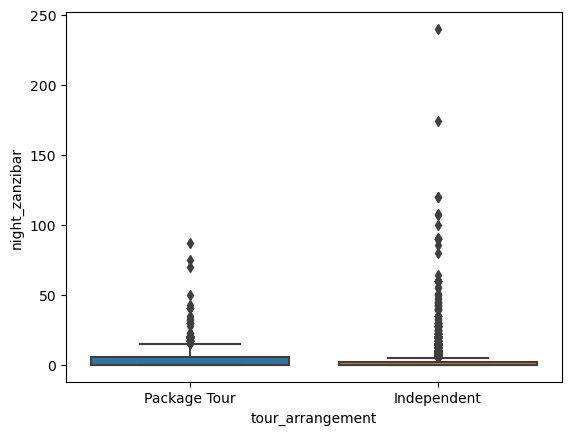

In [165]:
sns.boxplot(x='tour_arrangement', y='night_zanzibar', data=full);

In [150]:
full.quantile(0.75)

total_female       1.0
total_male         1.0
night_mainland    11.0
night_zanzibar     4.0
Name: 0.75, dtype: float64

In [77]:
X.total_male.value_counts(), X.total_female.value_counts()

(1.0     15779
 0.0      5737
 2.0      2036
 3.0       658
 4.0       193
 5.0        95
 6.0        68
 7.0        31
 8.0        18
 10.0       14
 9.0        13
 13.0        5
 15.0        5
 12.0        5
 11.0        4
 14.0        3
 17.0        2
 24.0        1
 58.0        1
 44.0        1
 40.0        1
 23.0        1
 20.0        1
 25.0        1
 90.0        1
 18.0        1
 Name: total_male, dtype: int64,
 1.0     12858
 0.0      8226
 2.0      2325
 3.0       690
 4.0       269
 5.0       111
 6.0        74
 7.0        28
 8.0        21
 10.0       15
 11.0       10
 12.0        9
 9.0         9
 14.0        7
 15.0        6
 13.0        5
 24.0        3
 20.0        2
 49.0        1
 17.0        1
 22.0        1
 26.0        1
 19.0        1
 23.0        1
 30.0        1
 Name: total_female, dtype: int64)